# Econ 611 Final Project
## Name: Jingwen Zhu

In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import nbconvert as nb

NameError: name 'allow' is not defined

## Introduction of the Project

I am a super video game fan and I usually watch twitch streaming during weekend. When I look up dataset for my final project, I find this twitch data. The main question i want to figure out is: What factors influence a game's popularity rank on Twitch? Because understanding these factors can help streamers optimize their streaming strategies and improve viewer engagement. I will use logitstic regression and MLE in this project. 


### 1. Load Data

For my Final project, I am using a twitch game data from 2021 - 2022

Here is the link to the original data: https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch/data.
- Rank - The ranking of games based on watched hours.
- Game - The name of the game.
- Month and Year - Time indicators for the data.
- Hours Watched - Total hours that viewers have spent watching the game.
- Hours Streamed - Total hours that streamers have streamed the game
- Peak Viewers - Maximum viewers at one instant
- Peak Channels - Maximum chanells at one instant
- Streamers - Amount of streamers who streamed the game
- Avg_viewers - The average number of viewers over the period.
- Avg_channels - The average number of channels streaming the game.
- Avg_viewer_ratio - Average amount of viewer per channel

In [106]:
twitch = pd.read_csv('/Users/jingwenzhu/Desktop/econ611/twitch_game_data(2021-2022).csv')
twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,Just Chatting,1,2021,248144653,3420670,2787896,8240,464702,333976,4603,72.54
1,2,Rust,1,2021,190468488,1147089,1373791,3249,91592,256350,1543,166.05
2,3,League of Legends,1,2021,170781975,4354400,689503,11606,294795,229854,5860,39.22
3,4,Escape From Tarkov,1,2021,110847591,1594856,441410,4268,67458,149189,2146,69.50
4,5,Fortnite,1,2021,101306583,7396984,997440,19348,689937,136348,9955,13.70


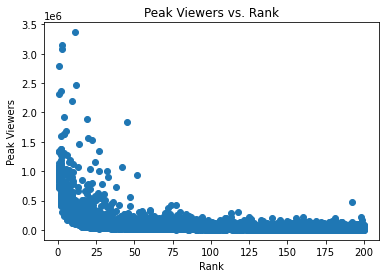

In [107]:
plt.scatter(twitch['Rank'], twitch['Peak_viewers'])
plt.title('Peak Viewers vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Peak Viewers')
plt.show()

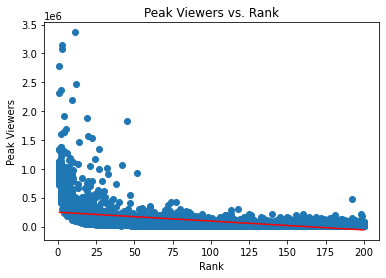

In [108]:
plt.scatter(twitch['Rank'], twitch['Peak_viewers'])
m, b = np.polyfit(twitch['Rank'], twitch['Peak_viewers'], 1)
plt.plot(twitch['Rank'], m * twitch['Rank'] + b, color='red')

plt.title('Peak Viewers vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Peak Viewers')
plt.show()

### 2. Organize Data

In my data, I add a new column called **Category**.

In this new column, I split the **Rank** to 5 groups:
- top 1-10 label as 1
- top 11 - 50 label as 2
- top 51 - 100 label as 3
- top 101 - 150 label as 4
- top 151 - 200 label as 5

In [109]:
def categorize_rank(rank):
    if 1 <= rank <= 10:
        return 1
    elif 11 <= rank <= 50:
        return 2
    elif 51 <= rank <= 100:
        return 3
    elif 101 <= rank <= 150:
        return 4
    elif 151 <= rank <= 200:
        return 5
    else:
        return None 

In [110]:
twitch['Category'] = twitch['Rank'].apply(categorize_rank)
twitch

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Category
0,1,Just Chatting,1,2021,248144653,3420670,2787896,8240,464702,333976,4603,72.54,1
1,2,Rust,1,2021,190468488,1147089,1373791,3249,91592,256350,1543,166.05,1
2,3,League of Legends,1,2021,170781975,4354400,689503,11606,294795,229854,5860,39.22,1
3,4,Escape From Tarkov,1,2021,110847591,1594856,441410,4268,67458,149189,2146,69.50,1
4,5,Fortnite,1,2021,101306583,7396984,997440,19348,689937,136348,9955,13.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,196,SCUM,12,2022,608613,47458,26987,151,3591,819,63,12.82,5
4796,197,Dungeon Fighter Online,12,2022,606520,17372,5243,70,742,816,23,34.91,5
4797,198,Detroit: Become Human,12,2022,600990,21395,23681,92,5198,808,28,28.09,5
4798,199,Super People,12,2022,597551,29116,23584,124,3432,804,39,20.52,5


In [111]:
# In here, I check the unique value of this new column to make sure there only 5 in it.
unique_val = twitch['Category'].unique()

print("Unique values in 'Category' are:", unique_val)

Unique values in 'Category' are: [1 2 3 4 5]


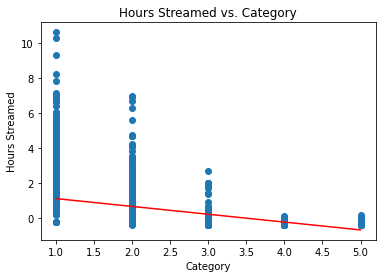

In [120]:
plt.scatter(twitch['Category'], twitch['Hours_streamed'])
m, b = np.polyfit(twitch['Category'], twitch['Hours_streamed'], 1)
plt.plot(twitch['Category'], m * twitch['Category'] + b, color='red')
plt.title('Hours Streamed vs. Category')
plt.xlabel('Category')
plt.ylabel('Hours Streamed')
plt.show()

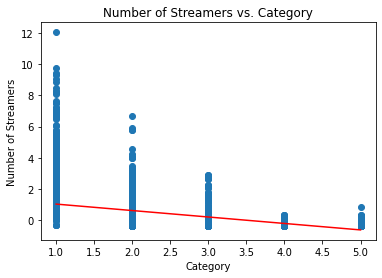

In [121]:
plt.scatter(twitch['Category'], twitch['Streamers'])
m, b = np.polyfit(twitch['Category'], twitch['Streamers'], 1)
plt.plot(twitch['Category'], m * twitch['Category'] + b, color='red')
plt.title('Number of Streamers vs. Category')
plt.xlabel('Category')
plt.ylabel('Number of Streamers')
plt.show()

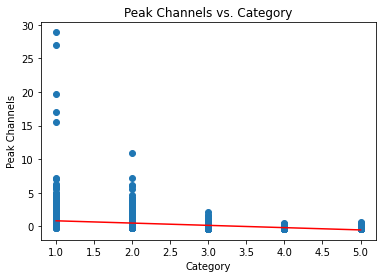

In [122]:
plt.scatter(twitch['Category'], twitch['Peak_channels'])
m, b = np.polyfit(twitch['Category'], twitch['Peak_channels'], 1)
plt.plot(twitch['Category'], m * twitch['Category'] + b, color='red')
plt.title('Peak Channels vs. Category')
plt.xlabel('Category')
plt.ylabel('Peak Channels')
plt.show()

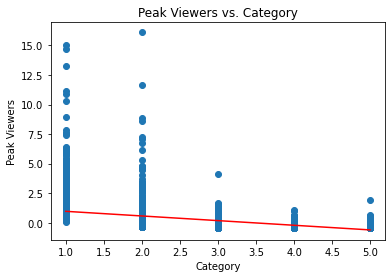

In [123]:
plt.scatter(twitch['Category'], twitch['Peak_viewers'])
m, b = np.polyfit(twitch['Category'], twitch['Peak_viewers'], 1)
plt.plot(twitch['Category'], m * twitch['Category'] + b, color='red')
plt.title('Peak Viewers vs. Category')
plt.xlabel('Category')
plt.ylabel('Peak Viewers')
plt.show()

### 3. Standarize
I define a function called **standardize**, and I use this function to standard my variables.

Because I have multiple variables, so I make a list called **columns_standardize** for these columns.

In [112]:
def standardize(df, column):
    var_mean = df[column].mean()
    var_std = df[column].std()
    df[column] = round((df[column] - var_mean) / var_std, 6)
    return df[column]

columns_standardize = ['Hours_streamed', 'Streamers', 'Peak_channels', 'Peak_viewers']

for column in columns_standardize:
    twitch[column] = standardize(twitch, column)
    
twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Category
0,1,Just Chatting,1,2021,248144653,4.684801,13.272019,2.378510,5.308955,333976,4603,72.54,1
1,2,Rust,1,2021,190468488,1.294918,6.306773,0.737439,0.713722,256350,1543,166.05,1
2,3,League of Legends,1,2021,170781975,6.076982,2.936278,3.485271,3.216376,229854,5860,39.22,1
3,4,Escape From Tarkov,1,2021,110847591,1.962533,1.714283,1.072492,0.416487,149189,2146,69.50,1
4,5,Fortnite,1,2021,101306583,10.613441,4.453037,6.030887,8.082956,136348,9955,13.70,1


### 4. Adding Intercept

In [113]:
twitch['intercept'] = 1
twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Category,intercept
0,1,Just Chatting,1,2021,248144653,4.684801,13.272019,2.378510,5.308955,333976,4603,72.54,1,1
1,2,Rust,1,2021,190468488,1.294918,6.306773,0.737439,0.713722,256350,1543,166.05,1,1
2,3,League of Legends,1,2021,170781975,6.076982,2.936278,3.485271,3.216376,229854,5860,39.22,1,1
3,4,Escape From Tarkov,1,2021,110847591,1.962533,1.714283,1.072492,0.416487,149189,2146,69.50,1,1
4,5,Fortnite,1,2021,101306583,10.613441,4.453037,6.030887,8.082956,136348,9955,13.70,1,1


### 5. Create New Dataframe and Array for Logit Regression

In [114]:
twitch_logit = twitch[['Category', 'intercept', 'Hours_streamed', 'Streamers', 'Peak_channels', 'Peak_viewers']]
twitch_logit.head()

,Category,intercept,Hours_streamed,Streamers,Peak_channels,Peak_viewers
0,1,1,4.684801,5.308955,2.378510,13.272019
1,1,1,1.294918,0.713722,0.737439,6.306773
2,1,1,6.076982,3.216376,3.485271,2.936278
3,1,1,1.962533,0.416487,1.072492,1.714283
4,1,1,10.613441,8.082956,6.030887,4.453037


In [115]:
twitch_array = np.array(twitch_logit)
twitch_array

array([[ 1.      ,  1.      ,  4.684801,  5.308955,  2.37851 , 13.272019],
       [ 1.      ,  1.      ,  1.294918,  0.713722,  0.737439,  6.306773],
       [ 1.      ,  1.      ,  6.076982,  3.216376,  3.485271,  2.936278],
       ...,
       [ 5.      ,  1.      , -0.383479, -0.350308, -0.300602, -0.343262],
       [ 5.      ,  1.      , -0.371967, -0.372059, -0.29008 , -0.34374 ],
       [ 5.      ,  1.      , -0.376774, -0.354656, -0.304877, -0.377228]])

### 6. Multinomial Logit

Estimate multinomial logit model with **'Hours_streamed', 'Streamers', 'Peak_channels', 'Peak_viewers'** as independant variables and **'Category'** as dependent variables.

In [116]:
mn_logit = sm.MNLogit(twitch_logit['Category'], twitch_logit[['intercept','Hours_streamed', 'Streamers', 'Peak_channels', 'Peak_viewers']]).fit()

mn_logit.summary()

Optimization terminated successfully.
         Current function value: 0.982126
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               Category   No. Observations:                 4800
Model:                        MNLogit   Df Residuals:                     4780
Method:                           MLE   Df Model:                           16
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.3502
Time:                        02:08:02   Log-Likelihood:                -4714.2
converged:                       True   LL-Null:                       -7254.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
    Category=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          3.9218      0.210     18.656      0.000       3.510       4.334
Hours_streamed    -1.3370      0.164     -8.151      0.000      -1.658      -1.015
Streamers          0.0044      0.148      0.030      0.976      -0.285       0.294
Peak_channels      0.2618      0.069      3.802      0.000       0.127       0.397
Peak_viewers      -0.8199      0.085     -9.602      0.000      -0.987      -0.653
----------------------------------------------------------------------------------
    Category=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          3.5623      0.219     16.272      0.000       3.133       3.991
Hours_streamed    -7.8573      0.513    -15.310      0.000      -8.863      -6.851
Streamers          2.6975      0.300      8.989      0.000       2.109       3.286
Peak_channels      0.4124      0.367      1.124      0.261      -0.306       1.131
Peak_viewers      -3.4230      0.210    -16.327      0.000      -3.834      -3.012
----------------------------------------------------------------------------------
    Category=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -0.0258      0.289     -0.089      0.929      -0.593       0.541
Hours_streamed   -19.5115      0.966    -20.200      0.000     -21.405     -17.618
Streamers          4.8982      0.474     10.337      0.000       3.969       5.827
Peak_channels      0.3081      0.650      0.474      0.635      -0.966       1.582
Peak_viewers      -6.6357      0.317    -20.964      0.000      -7.256      -6.015
----------------------------------------------------------------------------------
    Category=5       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -4.5200      0.396    -11.405      0.000      -5.297      -3.743
Hours_streamed   -34.3436      1.368    -25.102      0.000     -37.025     -31.662
Streamers          8.4842      0.584     14.520      0.000       7.339       9.629
Peak_channels      1.0280      0.785      1.309      0.190      -0.511       2.567
Peak_viewers      -9.2033      0.389    -23.667      0.000      -9.966      -8.441
==================================================================================
"""

#### Result:

The model used Maximum Likelihood Estimation (MLE) method and converged after 10 iterations.

The dependent variable is **'Category'**, and there were 4,800 observations in the analysis.

- For Category 2: 'Hours_streamed', 'Peak_viewers' have negative coefficients, indicating that as these increase, the likelihood of a game being in Category 2 relative to Category 1 decreases. 'Peak_channels' has a positive coefficient, suggesting an increase in likelihood with more channels.

- For Category 3: All variables except 'Peak_channels' are significant. 'Hours_streamed' and 'Peak_viewers' have large negative coefficients, while 'Streamers' has a positive one.

- For Catefory 4: All variables except 'Peak_channels' in Category 4 are significant with 'Hours_streamed', 'Peak_viewers' showing a negative association with the likelihood of a game being in these categories, and 'Streamers' showing a positive association.

**'Hours_streamed'** and **'Peak_viewers'** tend to have a strong negative relationship with the likelihood of being in a higher category.

**'Streamers'** tend to have a strong positive relationship.

The effect of **'Peak_channels'** is less clear and seems to be not statistically significant in higher categories.

### 7. Optimization

In [117]:
def sigmoid(data, beta):
    Xb = np.dot(data, beta)
    eXb = np.exp(Xb)
    p = eXb / (eXb.sum(1))[:, None]
    return p

In [118]:
def LL_mn(params, *args):
    
  
    y, X, n_params, n_class = args[0], args[1], args[2], args[3]
    
    beta = params
    
    beta = np.array(beta).reshape(n_params, -1, order = 'F')
    
    beta[:, 0] = [0]*n_params
    
    d = pd.get_dummies(y).to_numpy()
    
    probs = sigmoid(X, beta)

    logged = np.log(probs)
    
    ll = d * logged

    return -np.sum(ll)

In [119]:
n_params = 5

# number of classes
n_classes = 5

# starting values 
start_values = np.random.uniform(0, 1, n_params*n_classes)

#optimize
                                                          
optimize.minimize(LL_mn, x0 = start_values, args=(twitch_array[:,0], twitch_array[:, 1:], n_params, n_classes))['x']

array([ 2.42541119e-01,  6.79704940e-01,  3.93621797e-01,  2.96277888e-01,
        7.99923870e-01,  3.92182741e+00, -1.33695509e+00,  4.44631562e-03,
        2.61764662e-01, -8.19877694e-01,  3.56227262e+00, -7.85727617e+00,
        2.69753519e+00,  4.12356050e-01, -3.42295868e+00, -2.57780014e-02,
       -1.95114804e+01,  4.89818477e+00,  3.08117063e-01, -6.63568153e+00,
       -4.52001450e+00, -3.43436268e+01,  8.48417779e+00,  1.02798133e+00,
       -9.20334523e+00])

#### Result:

Category 2:
- In **Hours_streamed** The coefficient is -1.3370, indicating that an increase in hours streamed is associated with a decrease in the likelihood of a game being in Category 2 relative to base category (category1)
- In **Streamers** the positive coefficient 0.0044 shows a very small increase in the likelihood of being in Category 2 with more streamers.
- In **Peak_channel** the coefficient 0.2618 means that an increase in peak channels is associated with a slight increase in the likelihood of being in Category 2.
- In **Peak_viewers** the coefficient is negative -0.8199. Higher peak viewers are associated with a lower likelihood of a game being in Category 2.

Category 3:
- In **Hours_streamed** the coefficient is -7.8573 implies a significant decrease in the likelihood of a game being in Category 3 with more hours streamed.
- In **Streamers** a positive coefficient 2.6975 shows increase in the likelihood with more streamers.
- In **Peak_channel** 0.4124 coefficient is very tiny increase in the likelihood.
- In **Peak_viewers** the negative coefficient -3.4230 indicate that higher peak viewership significantly decreases the likelihood of being in Category 3.

Category 4:
- In **Hours_streamed** with a coefficient of -19.5115, this suggests that an increase in hours streamed is strongly associated with a decrease in the likelihood of a game being in Category 4. This could imply that beyond a certain point, more streaming hours could potentially oversaturate the audience or indicate a game's decline in popularity.
- In **Streamers** 4.8981 is the coefficient. It shows an increase in the number of streamers is associated with an increase in the likelihood of a game being in Category 4.
- In **Peak_channel** coefficient of 0.3081 shows a small positive effect on the likelihood of a game being in Category 4, suggesting that a higher number of peak channels streaming the game might slightly increase its rank.
- In **Peak_viewers** The coefficient is -6.6357 indicate higher peak viewership is associated with a decrease in the likelihood of a game being in Category 4.

Category 5:
- In **Hours_streamed** coefficient of -34.3436 is a very strong negative relation. This could mean that games with very high streaming hours tend to not fall into this lower popularity category, possibly because these games are either very popular or have a dedicated niche audience.
- In **Streamers** with coefficient 8.4842 suggesting that an increase in the number of streamers streaming the game is associated with a higher likelihood of the game being in Category 5. This could indicate that games with more streamers are more likely to be in a lower popularity category, possibly due to the diffusion of viewer attention across many channels.
- In **Peak_channel** with positive coefficient 1.0280 implies that an increase in the maximum number of channels streaming the game at one time is associated with an increase in the likelihood of the game being in Category 5. 
- In **Peak_viewers** it has negative coefficent -9.2033. indicating that games with higher peak viewership have a significantly lower likelihood of being in Category 5.



### 8. Marginal Effects

In [81]:
mn_logit.get_margeff(at='mean').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:               Category
Method:                          dydx
At:                              mean
==================================================================================
    Category=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Hours_streamed     0.0473      0.009      5.038      0.000       0.029       0.066
Streamers         -0.0130      0.003     -3.953      0.000      -0.019      -0.007
Peak_channels     -0.0036      0.002     -1.872      0.061      -0.007       0.000
Peak_viewers       0.0219      0.004      5.278      0.000       0.014       0.030
----------------------------------------------------------------------------------
    Category=2      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Hours_streamed     1.6177      0.107     15.157      0.000       1.408       1.827
Streamers         -0.6547      0.061    -10.729      0.000      -0.774      -0.535
Peak_channels     -0.0335      0.085     -0.393      0.695      -0.200       0.134
Peak_viewers       0.6344      0.044     14.529      0.000       0.549       0.720
----------------------------------------------------------------------------------
    Category=3      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Hours_streamed    -1.4905      0.109    -13.716      0.000      -1.703      -1.278
Streamers          0.6250      0.061     10.256      0.000       0.506       0.744
Peak_channels      0.0371      0.085      0.435      0.664      -0.130       0.205
Peak_viewers      -0.6030      0.044    -13.701      0.000      -0.689      -0.517
----------------------------------------------------------------------------------
    Category=4      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Hours_streamed    -0.1707      0.026     -6.470      0.000      -0.222      -0.119
Streamers          0.0417      0.008      5.564      0.000       0.027       0.056
Peak_channels     -0.0001      0.007     -0.020      0.984      -0.013       0.013
Peak_viewers      -0.0524      0.009     -5.765      0.000      -0.070      -0.035
----------------------------------------------------------------------------------
    Category=5      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Hours_streamed    -0.0037      0.001     -3.348      0.001      -0.006      -0.002
Streamers          0.0009      0.000      3.271      0.001       0.000       0.001
Peak_channels   8.789e-05   9.59e-05      0.916      0.360      -0.000       0.000
Peak_viewers      -0.0009      0.000     -3.187      0.001      -0.001      -0.000
==================================================================================
"""

#### Result:

Category 1:

- **Hours_streamed**: An increase of one standard deviation in the hours streamed increases the probability of a game being in Category 1 by 0.0473, holding other variables constant.
- **Streamers**: An increase of one standard deviation in the number of streamers decreases the probability of being in Category 1 by 0.0130.
- **Peak_channels**: The effect is not significant at the 5% level (p=0.061), implying that the number of peak channels does not have a clear-cut impact on the probability of a game being in Category 1.
- **Peak_viewers**: An increase of one standard deviation in the number of peak viewers increases the probability by 0.0219.

Category 2:

- **Hours_streamed**: A one standard deviation increase in hours streamed increases the probability of being in Category 2 by a substantial 1.6177.
- **Streamers**: Conversely, more streamers are associated with a significant decrease in the probability of being in Category 2 by 0.6547.
- **Peak_channels**: The effect is not significant (p=0.695).
- **Peak_viewers**: More peak viewers increase the probability by 0.6344.

Category 3:

- **Hours_streamed**: A one standard deviation increase leads to a decrease in the probability of being in Category 3 by 1.4905.
- **Streamers**: More streamers increase the probability by 0.6250.
- **Peak_channels**: The effect is not significant (p=0.664).
- **Peak_viewers**: More peak viewers decrease the probability by 0.6030.

Category 4:

- **Hours_streamed**: An increase leads to a decrease in the probability of being in Category 4 by 0.1707.
- **Streamers**:More streamers increase the probability by 0.0417.
- **Peak_channels**: The effect is not significant (p=0.984).
- **Peak_viewers**: More peak viewers decrease the probability by 0.0524.

Category 5:

- **Hours_streamed**: An increase slightly decreases the probability of being in Category 5 by 0.0037.
- **Streamers**: The effect is small and positive (0.0009).
- **Peak_channels**: The effect is not significant (p=0.916).
- **Peak_viewers**: An increase decreases the probability by 0.0009.

### 9. Conclusion/Result
There seems to be a complex relationship between the number of hours a game is streamed and its popularity rank. More hours streamed could increase visibility, it also appears to saturate the market, which could eventually lead to diminishing returns in terms of rank, especially for lower-ranked categories. Streamers shows mixed effects across the categories. For some categories, more streamers are associated with a higher likelihood of being in that category, possibly indicating a diversified interest. However, for the lowest rank (Category 5), a large number of streamers is associated with a game being in that lower popularity category, which could suggest oversaturation or a divided viewership. Peak_viewers consistently shows a strong influence, high peak viewership is associated with a higher likelihood of being in the top category. Peak_channels has varied effects, but the general trend suggests that a higher number of peak channels does not necessarily contribute to a higher rank. 

The analyse would suggest that strategies for increasing Twitch rank should consider the balance between content availability and audience concentration. Quality content that can attract viewers to tune in simultaneously seems to be more effective than simply increasing the quantity of streamed content.